### Lineare Regression für das Quartier Matthäus
Hierbei ist zu beachten, dass für eine korrekte Annahme zu wenig Daten vorhanden sind.
So können wir Beispielsweise keine Aussage über die Normalverteilung der Resiuen tätigen. Dies wäre erst ab ca. 30 Stichproben möglich.
Das selbige gillt für alle unten getroffenen Annahmen, zeigt sich jedoch bei der Normalverteilung am deutlichsten.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm 

In [93]:
data = pd.read_csv('Baselstadt Wohnviertel.csv', sep=';')
matthäus = data[(data.Wohnviertel_id == 17)]
matthäus = matthäus.sort_values(by = 'Jahr')
matthäus

,Jahr,Wohnviertel_id,Wohnviertel in Basel,Sozialhilfeempfänger,Anteil Ausländer,Anteil Personen ohne Religionszugehörigkeit,Anteil Personen in Einzenhaushalten,Gymnasialquote,Altersquotient,Anteil Sesshafte,...,Baujahr der Wohngebäude,Anteil Einfamilienhäuser,Anteil Grünflächen,Fläche pro Wohnung,Wohnfläche pro Person,Vermögenssteuer pro Veranlagung,Einkommenssteuer pro Veranlagung,Erwerbstätigenquote,Arbeitsplätze pro Einwohner,Arbeitslosenquote
131,2015,17,Matthäus,0.127677,0.516121,0.446714,0.241082,0.216346,0.165117,0.282304,...,1924.815303,0.071240,0.167294,67.381837,34.554332,419.033825,6202.489730,0.675245,0.188245,0.051271
135,2016,17,Matthäus,0.123114,0.511440,0.452016,0.241777,0.208122,0.168893,0.287720,...,1924.935909,0.071115,0.165313,67.272075,34.462789,426.099847,6286.644855,0.674688,0.189585,0.050653
107,2017,17,Matthäus,0.120088,0.506215,0.462021,0.244891,0.256983,0.172547,0.290898,...,1925.162281,0.071930,0.165775,67.282380,34.715461,474.928142,6265.424484,0.676677,0.176692,0.055471
115,2018,17,Matthäus,0.117195,0.505702,0.464999,0.243332,0.298343,0.177184,0.298217,...,1925.119194,0.070990,0.165724,67.244349,34.833732,491.566063,6313.323906,0.681281,0.183437,0.055595
86,2019,17,Matthäus,0.115715,0.507988,0.469544,0.247441,0.264865,0.181430,0.306336,...,1925.236220,0.070866,0.165343,67.260189,34.932338,568.759685,6536.435786,0.681281,0.187229,0.055595
95,2020,17,Matthäus,0.109726,0.502611,NaN,0.263346,0.288043,0.188848,0.308740,...,1925.199651,0.069747,0.165337,67.226768,35.749175,584.742692,6539.795265,0.702700,0.184706,NaN
52,2021,17,Matthäus,0.110954,0.506850,NaN,0.264542,0.259067,0.191055,0.306303,...,1925.374126,0.068182,0.166081,67.229025,35.985475,574.400000,6827.700000,0.713825,0.183372,NaN


Text(0.5, 1.0, 'Sozialhilfeempfängerquote Matthäus-Quartier')

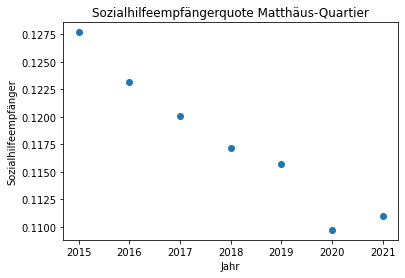

In [108]:
x = matthäus['Jahr'].values.reshape(-1,1)
y = matthäus['Sozialhilfeempfänger'].values.reshape(-1,1)

plt.xlabel('Jahr')
plt.ylabel('Sozialhilfeempfänger')
plt.scatter(x,y)
plt.title('Sozialhilfeempfängerquote Matthäus-Quartier')

In [95]:

model = LinearRegression().fit(x, y)
x_new = np.arange(2014,2031).reshape(-1,1)
y_new = model.predict(x_new)

In [96]:
r_sq = model.score(x,y)
print(r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

0.9530595965647158
intercept: [5.9784328]
slope: [[-0.00290419]]


Die Genauigkeit des Modells ist mit über 95% sehr gut!

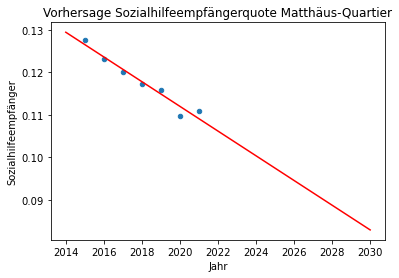

In [103]:
matthäus.plot.scatter(x='Jahr',y='Sozialhilfeempfänger')
plt.plot(x_new, y_new, color='r')
plt.title('Vorhersage Sozialhilfeempfängerquote Matthäus-Quartier')
plt.show()


Unser Modell gibt uns im Jahr 2030 bei gleichbleibender Bedingungen eine Sozialhilfeempfängerquote von rund 8,3%

In [102]:
matthäus_2030 = y_new[16,0]
matthäus_2030

0.08293091697142962

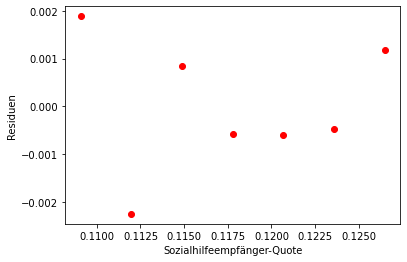

In [100]:
predict= model.predict(x)
resid = y-predict
plt.xlabel('Sozialhilfeempfänger-Quote')
plt.ylabel('Residuen')
plt.plot(predict, resid, 'o', color = 'r')


Die Residuen sind Gleichverteil und weisen keinen Systematischen fehler auf.

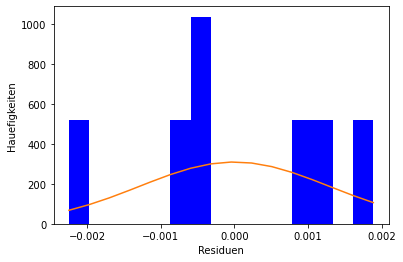

In [101]:
n, bins, patches = plt.hist(resid, bins=15, facecolor='blue',stacked=True,density=True)
plt.xlabel('Residuen')
plt.ylabel('Hauefigkeiten')

mu = np.average(resid)
sigma = np.std(resid)

y_norm = norm.pdf(bins, mu, sigma)
plt.plot(bins, y_norm)

Wie schon oben erwähnt können wir keine korrekte Annahme bzüglich der Normalverteilung unserer Residuen treffen.